In [37]:
import numpy as np

def f2wl(val,val_unc = 0):
# % Converts wavlength to frequency, and vice versa, with (absolute) uncertainty 
# % The conversion is reciprocal, so this function converts both ways.
# %   Inputs:     Wavelength (or frequency) in meters (or Hz)
# %         (opt) Uncertainty (in same units)
# %   Outputs:    Frequency (or wavelength) in Hz (or m)
# %               Uncertainty (in same units) (iff also passed as input)
# % TODO
# % example usage
# % test script

    c = 299792458
    f = c/val
    if val_unc is not None:
        df = c*val_unc/val**2
    
    return f,df


wl_1 = 413.0938e-9
wl_1_unc = np.linalg.norm([0.002e-9,0.0009e-9])
f1,f1_unc=f2wl(wl_1,wl_1_unc)

f2,f2_unc = 725736400e6,np.linalg.norm([40e6,260e6])
wl_2,wl_2_unc = f2wl(f2,f2_unc)

print('First measurement, nm ()')
print(wl_1/1e6,wl_1_unc*1e9)
print('First measurement, MHz')
print(f1/1e6,f1_unc/1e6)

print('\n')

print('Second measurement, MHz')
print(f2/1e6,f2_unc/1e6)
print('Second measurement, nm')
print(wl_2/1e6,wl_2_unc*1e9)
print('\n')

print('Uncertainty ratios: wl, freq')
print(wl_1_unc/wl_2_unc,f1_unc/f2_unc)

print('\n')
print('Measurement diff, MHz')
print((f2-f1)/1e6)
print('Measurement diff, nm')
print((wl_2-wl_1)*1e9)





First measurement, nm
4.1309380000000003e-13 0.0021931712199461306
First measurement, MHz
725724903.1575879 3852.9723060559477


Second measurement, MHz
725736400.0 263.0589287593181
Second measurement, nm
4.130872559237762e-13 0.00014973245248196847


Uncertainty ratios: wl, freq
14.647267065970508 14.64680299668204


Measurement diff, MHz
11496.842412125
Measurement diff, nm
-0.006544076223828106


# Level diagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


datafile = 'drake_levels/all_transitions.txt'

colnames = ['N', 'lower', 'upper', 'J_l', 'J_u', 'l_air', 'l_vac', 'unit', 'E_low', 'E_up', 'A_ul', 'SA_ul', 'f_lu',  'rat']
dtypes = {'N':int,
          'lower':str,
          'upper':str,
          'J_l':int,
          'J_u':int,
          'l_air':float,
          'l_vac':float,
          'unit':str,
          'E_low':float,
          'E_up':float,
          'A_ul':float,
          'SA_ul':float,
          'f_lu':float,
          'rat':float}
df = pd.read_csv(datafile)
df

,N,lower,upper,J_l,J_u,l_air,l_vac,unit,E_low,E_up,A_ul,SA_ul,f_lu,rat
0,1,1^1S,2^1P,0,1,NaN,584.334357,NaN,0.000000,171134.896946,1.798900e+09,1.800900e+09,2.761600e-01,1.0
1,2,1^1S,3^1P,0,1,NaN,537.029918,NaN,0.000000,186209.364940,5.663400e+08,5.799600e+08,7.343500e-02,1.0
2,3,1^1S,4^1P,0,1,NaN,522.213086,NaN,0.000000,191492.711909,2.435600e+08,2.522700e+08,2.986300e-02,1.0
3,4,1^1S,5^1P,0,1,NaN,515.616842,NaN,0.000000,193942.462294,1.258200e+08,1.311500e+08,1.504000e-02,1.0
4,5,1^1S,6^1P,0,1,NaN,512.098563,NaN,0.000000,195274.908466,7.317400e+07,7.657500e+07,8.627700e-03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,935,10^3S,10^1P,1,1,NaN,70.856304,cm-1,197145.233258,197216.089562,2.725400e-04,1.678400e+07,8.140000e-08,NaN
2495,936,10^3P,10^1D,1,2,NaN,14.656262,cm-1,197198.333268,197212.989530,2.977000e-03,1.790300e+06,3.467500e-05,NaN
2496,936,10^3P,10^1D,2,2,NaN,14.656808,cm-1,197198.332722,197212.989530,1.059200e-03,1.790300e+06,7.402400e-06,NaN
2497,937,10^3D,10^1P,1,1,NaN,3.262439,cm-1,197212.827123,197216.089562,1.497700e-08,1.678400e+07,2.118300e-09,NaN


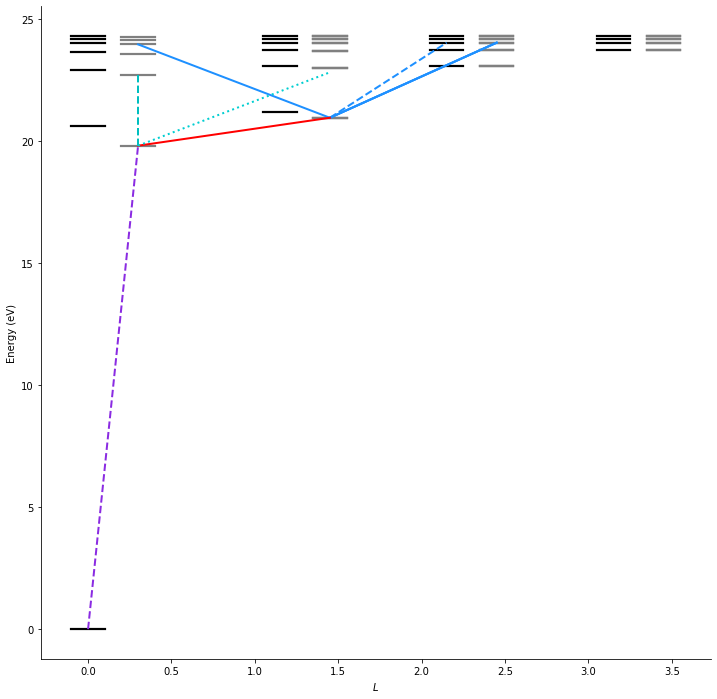

In [8]:
num_multiplets = 937

# We can be pretty rough for the first instance. Just need to find 
# the first instance of any multiplet as they'll be very similar

# and let's just look at the lower ones.. we can be very crude here


def wavenum2eV(E_in):
    E = E_in/8065.544
    return E

L_symbols = ['S','P','D','F','G','H','I']
L_values = {'S':0,'P':1,'D':2,'F':3,'G':4,'H':5,'I':6}
N_max = 7
L_max = 3
E_levels = {}

for n in range(N_max):
    for L in range(min(L_max+1,n+1)):
        for S in [1,3]:
            level_string = f'{n+1}^{S}{L_symbols[L]}'
            matched_lower = df[(df['lower']==level_string)]
            for J in range(L+2):
                full_string = f'{level_string}_{J}'
                matched_j = matched_lower[(matched_lower['J_l']==f'{J}')]

                E_levels[full_string]= {'N':n+1,
                                        'L':L,
                                         'S':(S-1)/2,
                                         'J':J,
                                         'E':np.mean(matched_j['E_low']),
                                         'E_std':np.std(matched_j['E_low']),
                                         'num':len(matched_j)
                                         }
#                 if E_levels[full_string]['E']>0:
                E = wavenum2eV(E_levels[full_string]['E'])
                E_levels[full_string]['E_ev'] = E
        
    
    
    
line_length = 0.25
spacing = 3*line_length/2

transitions = ['5^3D_1','5^3D_2','5^3D_3','5^1D_2','5^3S_1']
cool_line = ['2^3S_1','2^3P_2']
tuneout_levels = ['2^3P','3^3P'] 

def lvl2x(lvl):
    return lvl['L'] + lvl['S']*0.3 +(lvl['L']>0)*0.15
def wl2ev(l):
    h = 6.63e-34
    c = 299792458
    q = 1.6e-19
    return h*c/(l*q)
    


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
for lev in E_levels:
    if E_levels[lev]['S'] == 0: #singlets
        mfcolor = [0,0,0]
        sign = 0
    else:
        mfcolor = [1/2,1/2,1/2]
        sign = 1
    plt.plot(lvl2x(E_levels[lev]) + 0.2*np.array([-1,1])/2,
             E_levels[lev]['E_ev']*np.array([1,1]),
             color=mfcolor,linewidth=2.2)
    
tr_lw = 2

for tr in transitions:
    if tr == '5^1D_2':
        sty = '--'
    else:
        sty = '-'
    plt.plot([lvl2x(E_levels['2^3P_2']),lvl2x(E_levels[tr])],
                [E_levels['2^3P_2']['E_ev'],E_levels[tr]['E_ev']],
             'dodgerblue',linestyle=sty,linewidth=tr_lw)
    
plt.plot([lvl2x(E_levels[cool_line[0]]),lvl2x(E_levels[cool_line[1]])],
            [E_levels[cool_line[0]]['E_ev'],E_levels[cool_line[1]]['E_ev']],
         'r',linewidth=tr_lw)

plt.plot([lvl2x(E_levels['1^1S_0']),lvl2x(E_levels['2^3S_1'])],
            [E_levels['1^1S_0']['E_ev'],E_levels['2^3S_1']['E_ev']],color='blueviolet',linestyle='--',linewidth=tr_lw)

plt.plot([lvl2x(E_levels['2^3S_1']),lvl2x(E_levels['3^3S_1'])],
            [E_levels['2^3S_1']['E_ev'],E_levels['3^3S_1']['E_ev']],color='c',linestyle='--',linewidth=tr_lw)

plt.plot([lvl2x(E_levels['2^3S_1']),lvl2x(E_levels['3^3P_1'])],
            [E_levels['2^3S_1']['E_ev'],E_levels['2^3S_1']['E_ev']+wl2ev(413e-9)],
             color='darkturquoise',linestyle=':',linewidth=tr_lw)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('$L$')
plt.ylabel('Energy (eV)')

plt.savefig('lvl_diag_full.svg')

plt.show()


        